# 3rd period

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("dataset/star_classification.csv")

In [4]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

## Treinando a rede neural

### Pré-processando os dados

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = df.drop(columns=['class'])
Y = df['class']


Y = LabelEncoder().fit_transform(Y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

## Arquitentando a rede neural
#### (A tomada de decisão a respeito de layes, modelos, otimizadores para essa rede neural foram tomadas com base nos resultdados dos testes, que estão neste notebook após esse treinamento)

In [7]:
# Dense: camada totalmente conectada, cada neurônio recebe entrada de todos os neurônios da camada anterior.
# Dropout: técnica de regularização que "desliga" aleatoriamente uma fração dos neurônios durante o treinamento para evitar overfitting.
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(set(Y)), activation='softmax')  
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,331 (13.01 KB)

 Trainable params: 3,331 (13.01 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32, verbose=True)

Epoch 1/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7694 - loss: 0.5442 - val_accuracy: 0.9436 - val_loss: 0.1823
Epoch 2/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9331 - loss: 0.3287 - val_accuracy: 0.9511 - val_loss: 0.1492
Epoch 3/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9488 - loss: 0.1929 - val_accuracy: 0.9586 - val_loss: 0.1352
Epoch 4/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9542 - loss: 0.1612 - val_accuracy: 0.9624 - val_loss: 0.1254
Epoch 5/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9583 - loss: 0.1374 - val_accuracy: 0.9611 - val_loss: 0.1273
Epoch 6/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9601 - loss: 0.1279 - val_accuracy: 0.9636 - val_loss: 0.1225
Epoch 7/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9609 - loss: 0.1281 - val_accuracy: 0.9634 - val_loss: 0.1245
Epoch 8/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9624 - loss: 0.1295 - 

In [9]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Acurácia: {accuracy:.2%}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9694 - loss: 0.1042
Acurácia: 96.99%


### Testando diferentes larguras e profundidades na rede neural


In [10]:
results = []

for depth in [1, 2, 3, 4]:
    for width in [16, 32, 64, 128]:
        model = Sequential()
        model.add(Dense(width, activation='relu', input_shape=(X_train.shape[1],)))
        for _ in range(depth-1):
            model.add(Dense(width, activation='relu'))
            model.add(Dropout(0.2))
        model.add(Dense(len(set(Y)), activation='softmax'))
        model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=False)
        loss, acc = model.evaluate(X_test, Y_test, verbose=False)
        results.append({'layers': depth, 'width': width, 'test_accuracy': acc})

results_df = pd.DataFrame(results)
results_df

,layers,width,test_accuracy
0,1,16,0.96470
1,1,32,0.96405
2,1,64,0.96525
3,1,128,0.96475
4,2,16,0.96510
5,2,32,0.96670
6,2,64,0.96700
7,2,128,0.96480
8,3,16,0.96290
9,3,32,0.96585


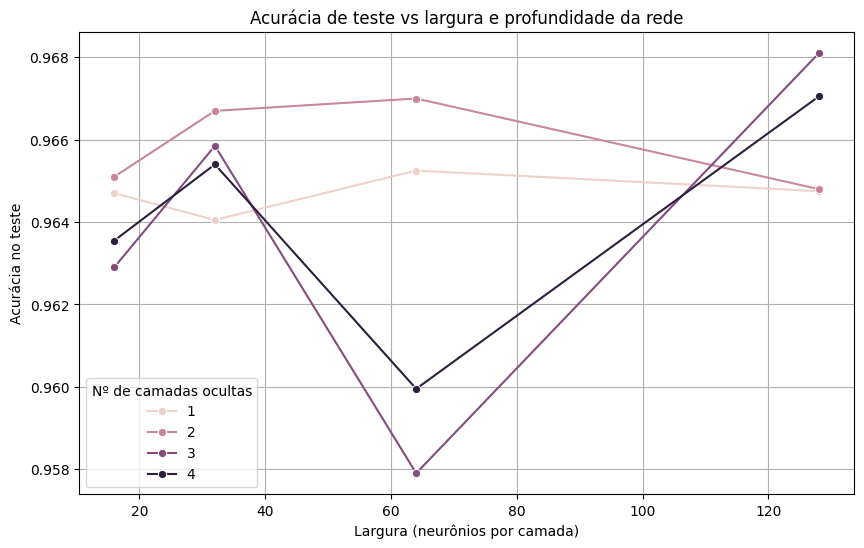

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data=results_df, x='width', y='test_accuracy', hue='layers', marker='o')
plt.title('Acurácia de teste vs largura e profundidade da rede')
plt.xlabel('Largura (neurônios por camada)')
plt.ylabel('Acurácia no teste')
plt.legend(title='Nº de camadas ocultas')
plt.grid(True)
plt.show()

### Testando diferentes valores de épocas e learning rate


In [12]:
import numpy as np

results_epochs_lr = []

for epochs in [5, 10, 15, 25]:
    for lr in [0.001, 0.01, 0.05]:
        model = Sequential([
            Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(len(set(Y)), activation='softmax')
        ])
        optimizer = Adam(learning_rate=lr)
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, Y_train, validation_split=0.2, epochs=epochs, batch_size=32, verbose=0)
        val_acc = history.history['val_accuracy'][-1]
        train_acc = history.history['accuracy'][-1]
        val_loss = history.history['val_loss'][-1]
        train_loss = history.history['loss'][-1]
        results_epochs_lr.append({
            'epochs': epochs,
            'learning_rate': lr,
            'train_acc': train_acc,
            'val_acc': val_acc,
            'train_loss': train_loss,
            'val_loss': val_loss,
            'history': history.history
        })

results_epochs_lr_df = pd.DataFrame(results_epochs_lr)
results_epochs_lr_df[['epochs','learning_rate','train_acc','val_acc','train_loss','val_loss']]

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,epochs,learning_rate,train_acc,val_acc,train_loss,val_loss
0,5,0.001,0.959188,0.961750,0.134796,0.124415
1,5,0.010,0.948234,0.956438,0.163618,0.137014
2,5,0.050,0.873328,0.910563,0.375619,0.308922
3,10,0.001,0.963391,0.962875,0.119862,0.121155
4,10,0.010,0.952219,0.960813,0.152509,0.135694
5,10,0.050,0.845937,0.931625,0.442005,0.281416
6,15,0.001,0.964484,0.964813,0.116006,0.114692
7,15,0.010,0.951719,0.953625,0.152731,0.144679
8,15,0.050,0.921938,0.944500,0.278567,0.207734
9,25,0.001,0.966406,0.963625,0.111141,0.120105


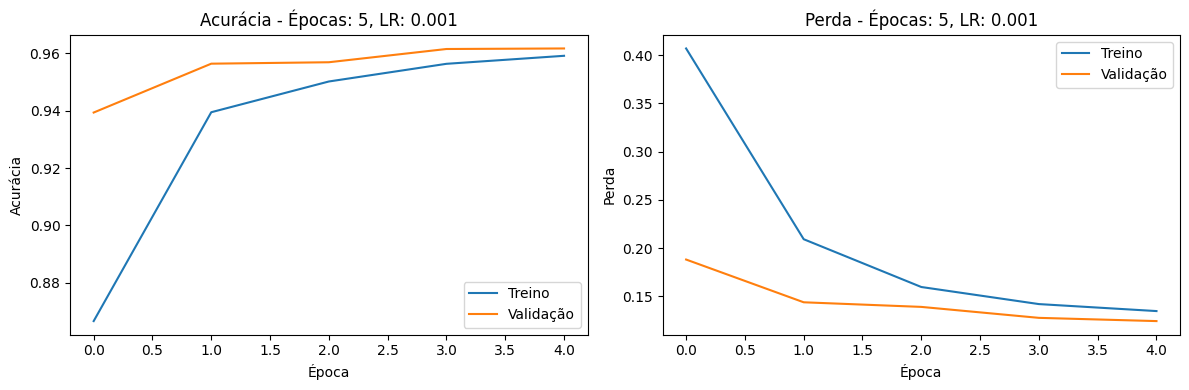

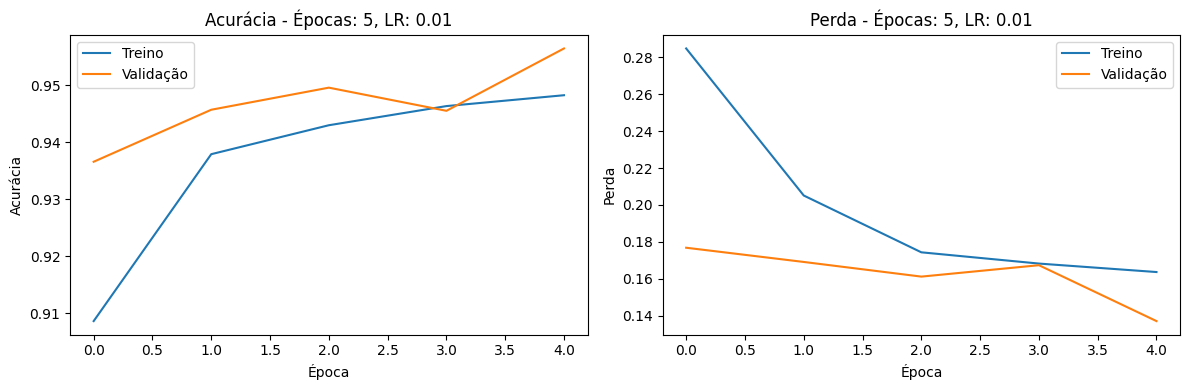

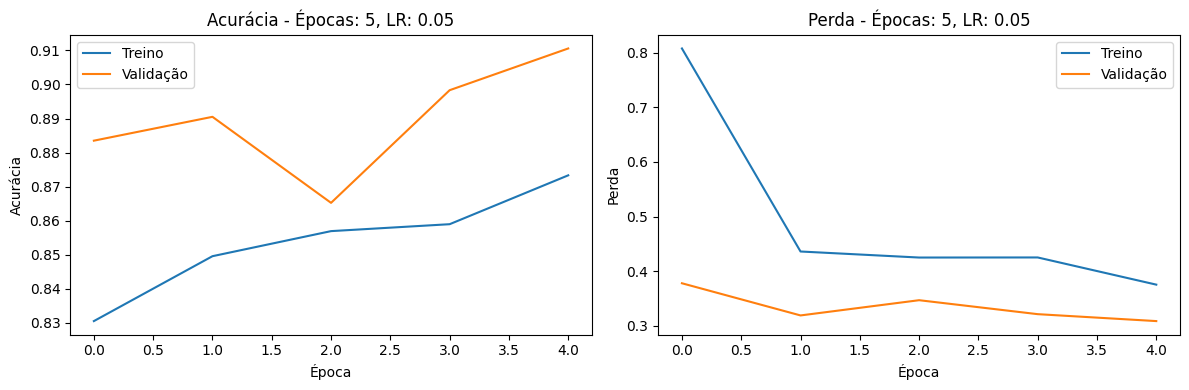

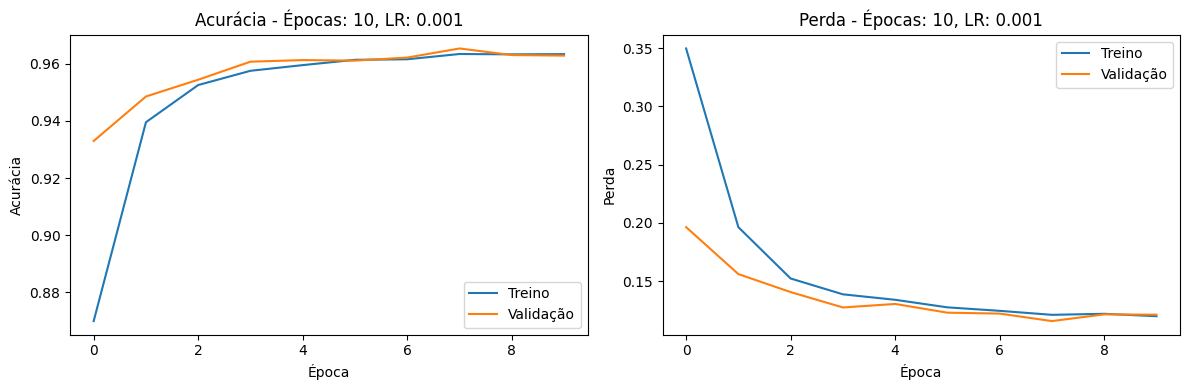

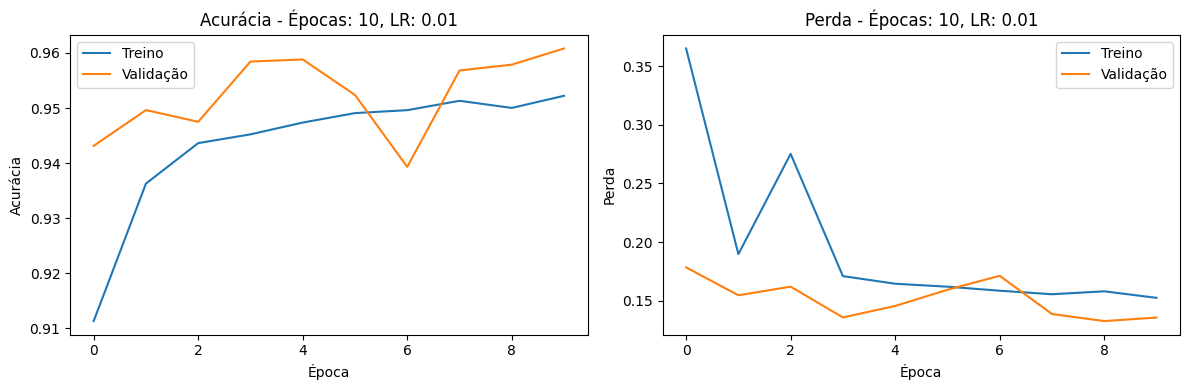

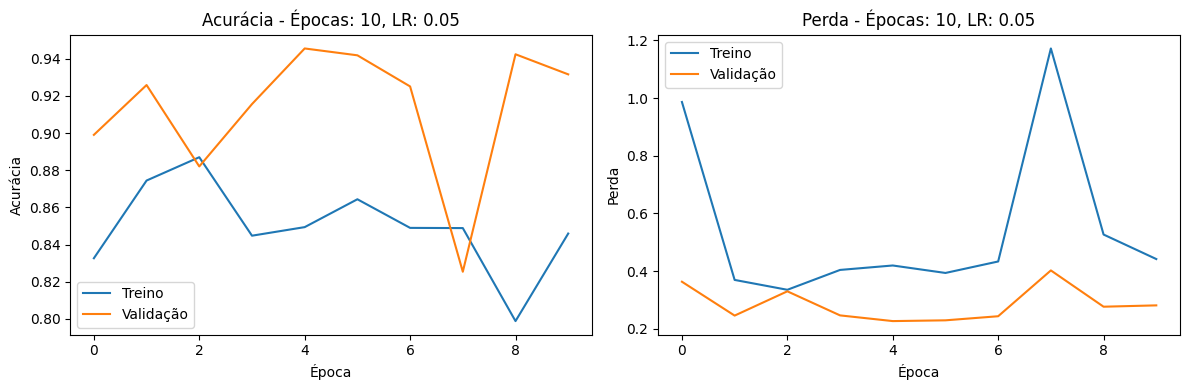

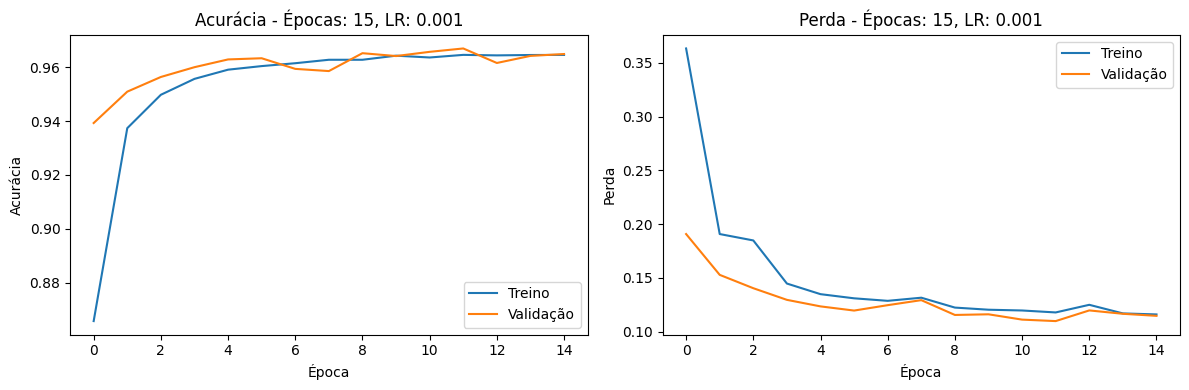

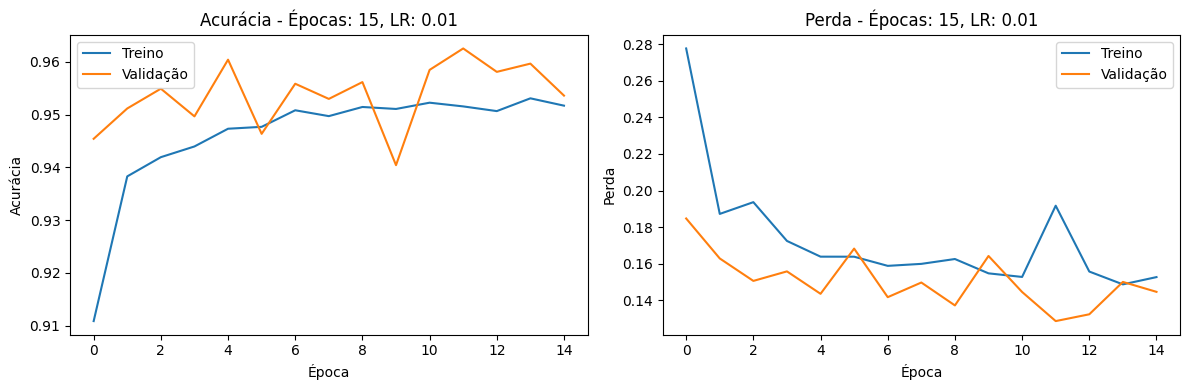

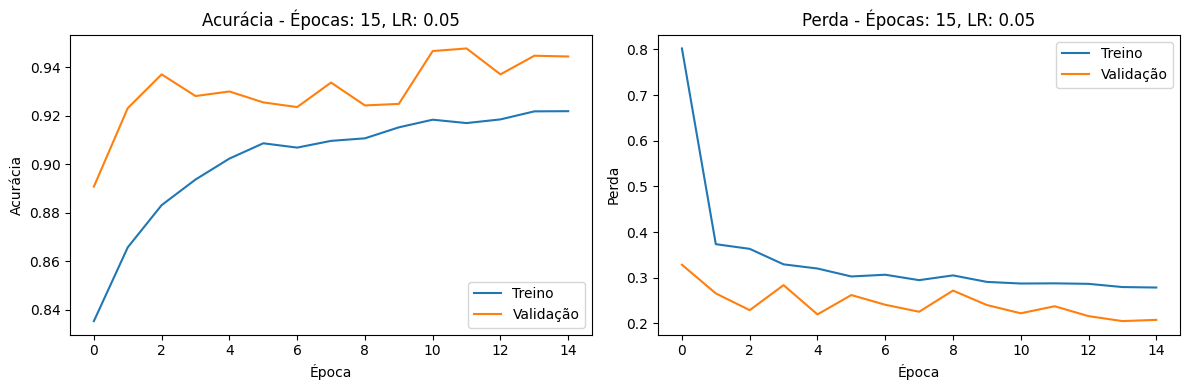

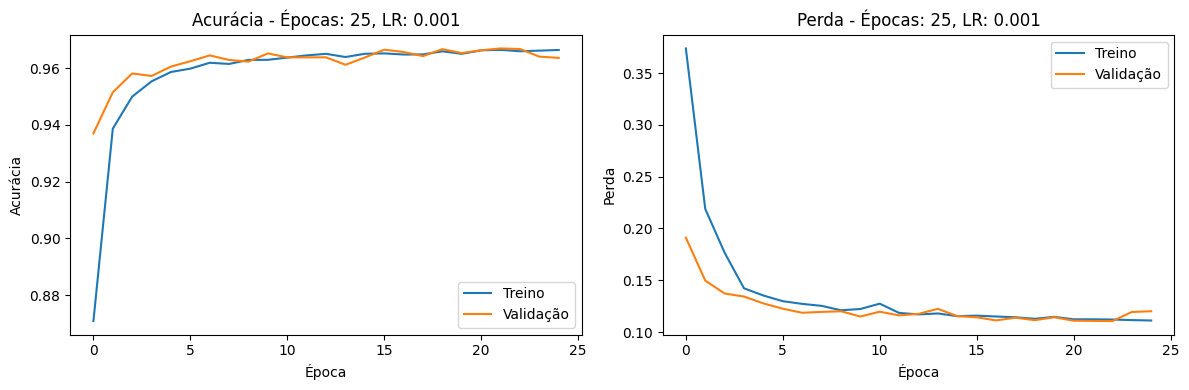

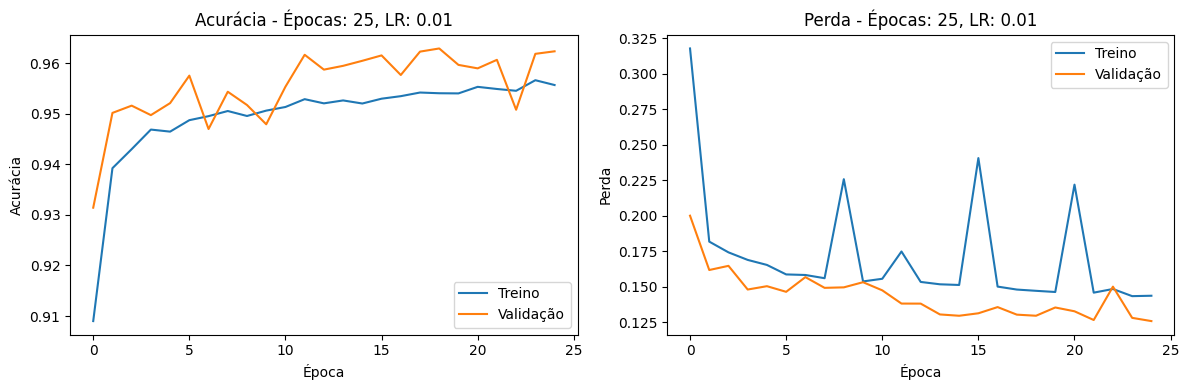

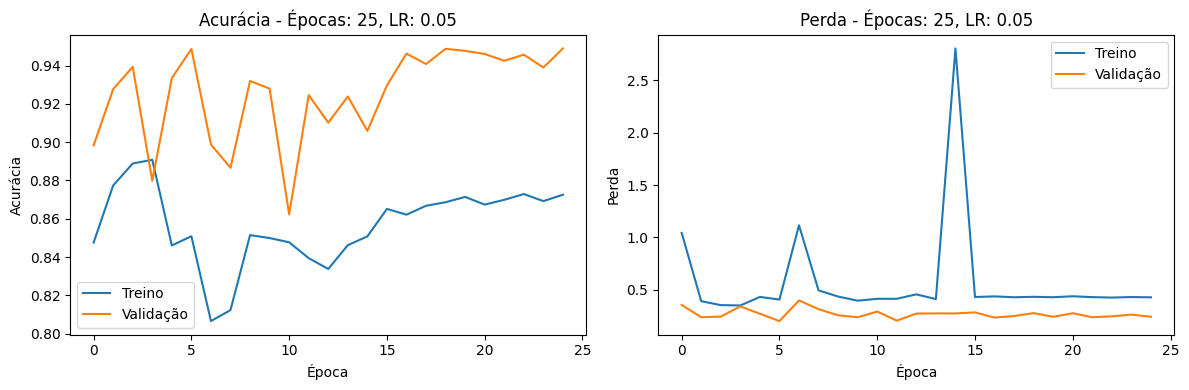

In [13]:
"""
Overfitting: Acurácia de treino muito maior que a de validação, ou perda de validação aumentando enquanto a de treino diminui.
Underfitting: Ambas acurácias baixas e próximas, ou ambas perdas altas.
Bom ajuste: Acurácias altas e próximas, perdas baixas e próximas.
"""
def plot_history(history, epochs, lr):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history['accuracy'], label='Treino')
    plt.plot(history['val_accuracy'], label='Validação')
    plt.title(f'Acurácia - Épocas: {epochs}, LR: {lr}')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history['loss'], label='Treino')
    plt.plot(history['val_loss'], label='Validação')
    plt.title(f'Perda - Épocas: {epochs}, LR: {lr}')
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.legend()
    plt.tight_layout()
    plt.show()

to_plot = results_epochs_lr_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11]] 
for idx, row in to_plot.iterrows():
    plot_history(row['history'], row['epochs'], row['learning_rate'])

### Testando o efeito da Regularização e diferentes métodos de otimização

- **Regularização**: Dropout e L2 (kernel_regularizer)
- **Otimizadores**: Adam, SGD, RMSprop

In [14]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

"""
Regularização (Dropout/L2) pode reduzir overfitting, mas excesso pode causar underfitting.
Otimizadores diferentes podem acelerar ou dificultar a convergência.
"""

results_reg_opt = []

for reg in [None, l2(0.001), l2(0.01)]:
    for dropout in [0.0, 0.2]:
        for opt_name, opt in [('Adam', Adam()), ('SGD', SGD()), ('RMSprop', RMSprop())]:
            model = Sequential()
            model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=reg))
            if dropout > 0:
                model.add(Dropout(dropout))
            model.add(Dense(32, activation='relu', kernel_regularizer=reg))
            if dropout > 0:
                model.add(Dropout(dropout))
            model.add(Dense(len(set(Y)), activation='softmax'))
            model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=0)
            val_acc = history.history['val_accuracy'][-1]
            train_acc = history.history['accuracy'][-1]
            val_loss = history.history['val_loss'][-1]
            train_loss = history.history['loss'][-1]
            results_reg_opt.append({
                'reg': str(reg),
                'dropout': dropout,
                'optimizer': opt_name,
                'train_acc': train_acc,
                'val_acc': val_acc,
                'train_loss': train_loss,
                'val_loss': val_loss,
                'history': history.history
            })

results_reg_opt_df = pd.DataFrame(results_reg_opt)
results_reg_opt_df[['reg','dropout','optimizer','train_acc','val_acc','train_loss','val_loss']]

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,reg,dropout,optimizer,train_acc,val_acc,train_loss,val_loss
0,None,0.0,Adam,0.968641,0.963938,0.099893,0.116385
1,None,0.0,SGD,0.965719,0.962125,0.114172,0.130170
2,None,0.0,RMSprop,0.967609,0.962687,0.110987,0.123839
3,None,0.2,Adam,0.965156,0.967188,0.131891,0.111605
4,None,0.2,SGD,0.959422,0.962313,0.136286,0.129511
5,None,0.2,RMSprop,0.963938,0.965187,0.132616,0.130593
6,<keras.src.regularizers.regularizers.L2 object...,0.0,Adam,0.966109,0.961875,0.135420,0.148271
7,<keras.src.regularizers.regularizers.L2 object...,0.0,SGD,0.963344,0.959437,0.166807,0.176908
8,<keras.src.regularizers.regularizers.L2 object...,0.0,RMSprop,0.963313,0.964063,0.164747,0.145325
9,<keras.src.regularizers.regularizers.L2 object...,0.2,Adam,0.960422,0.959000,0.153609,0.158316


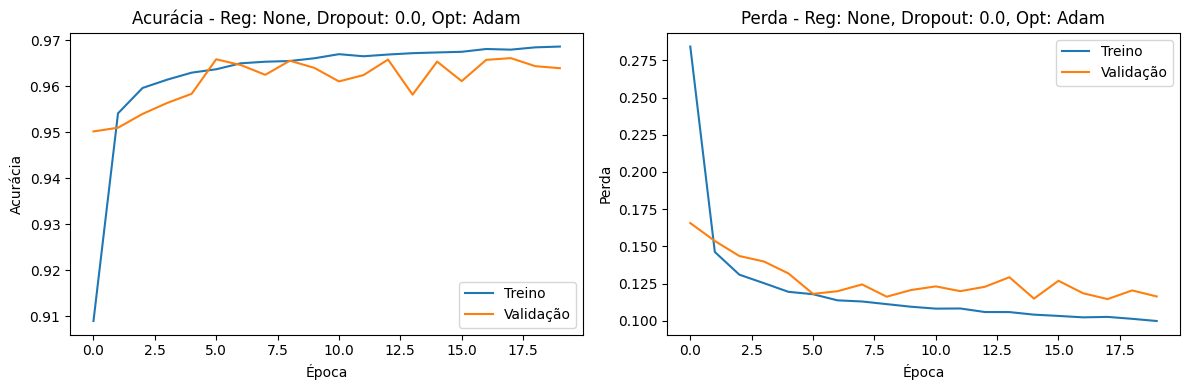

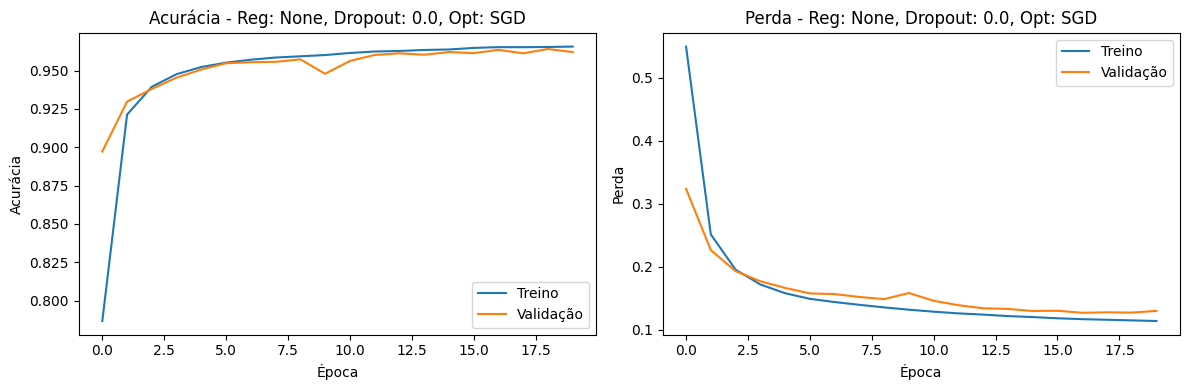

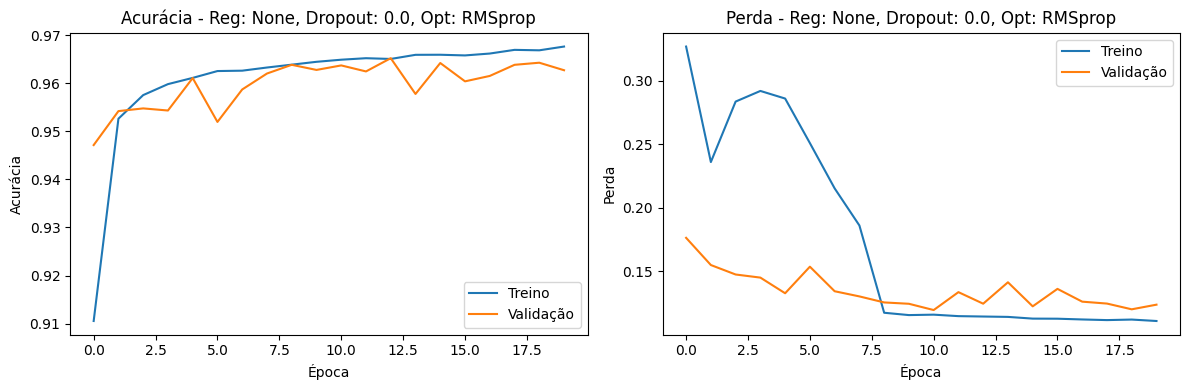

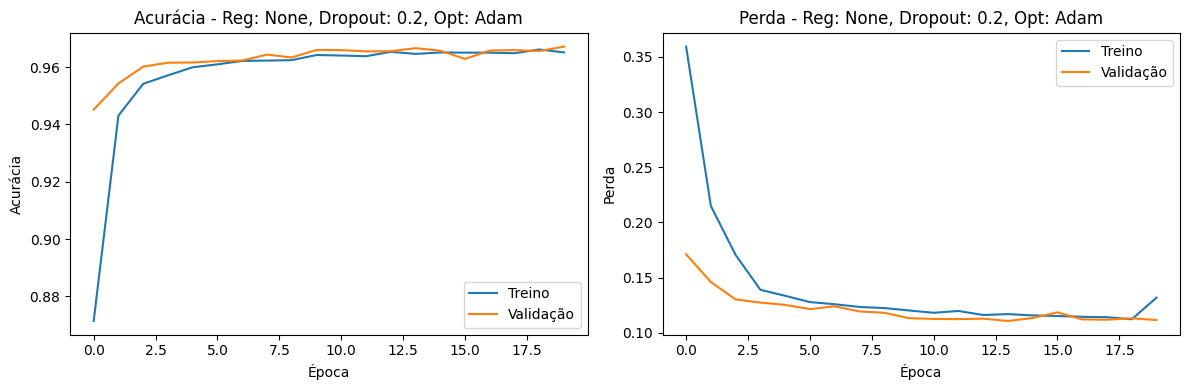

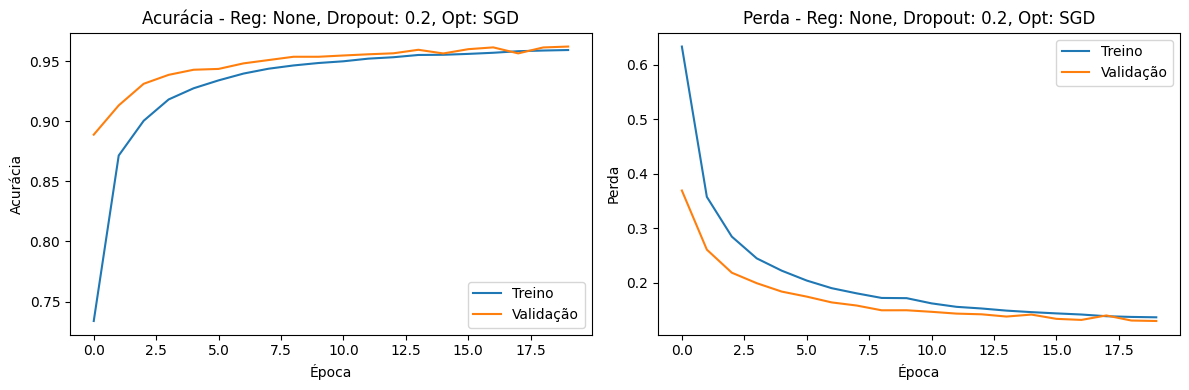

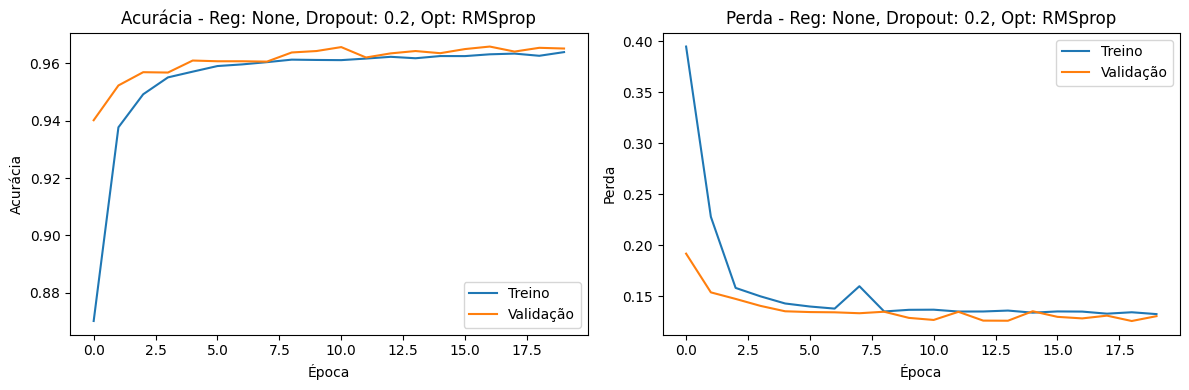

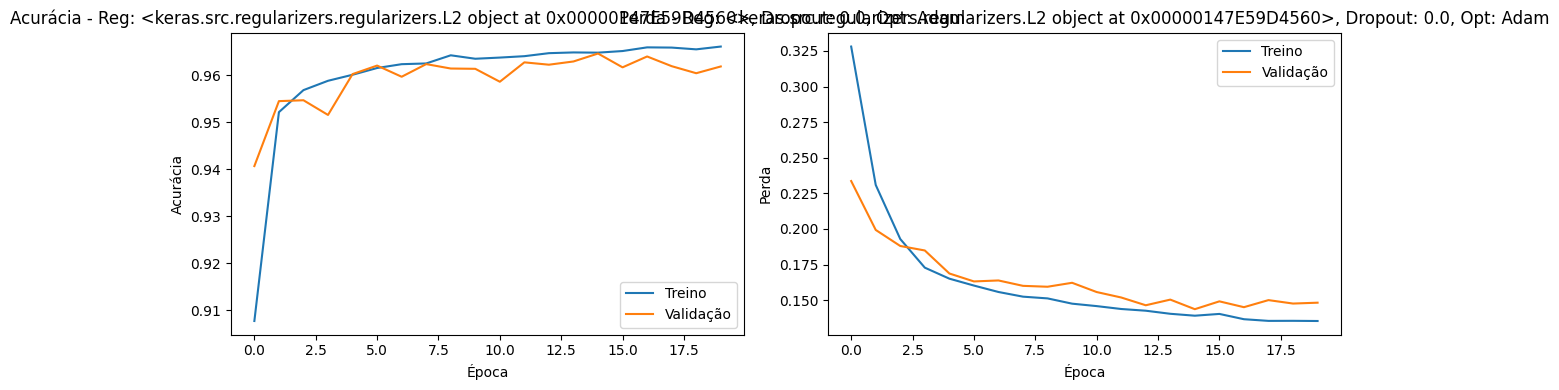

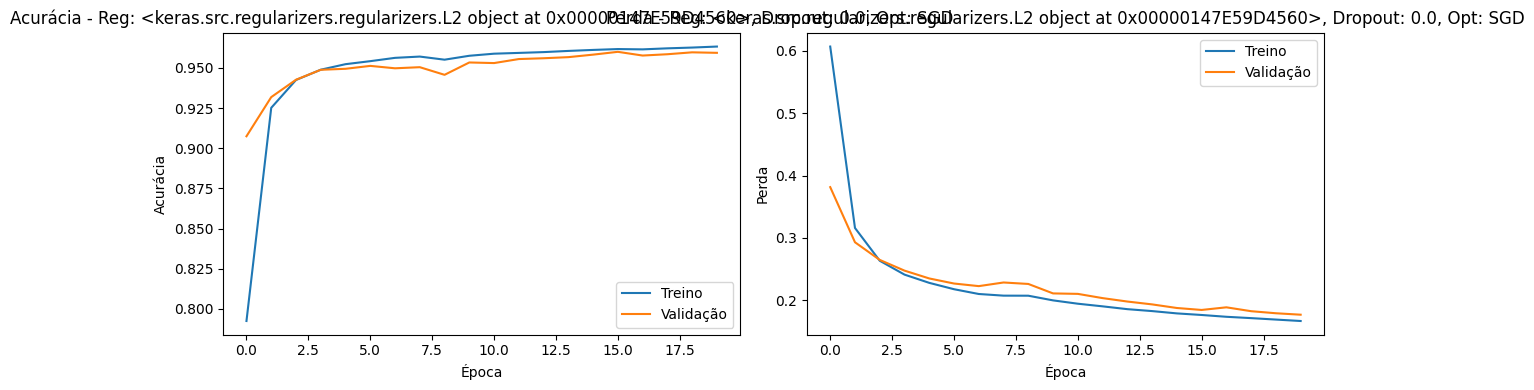

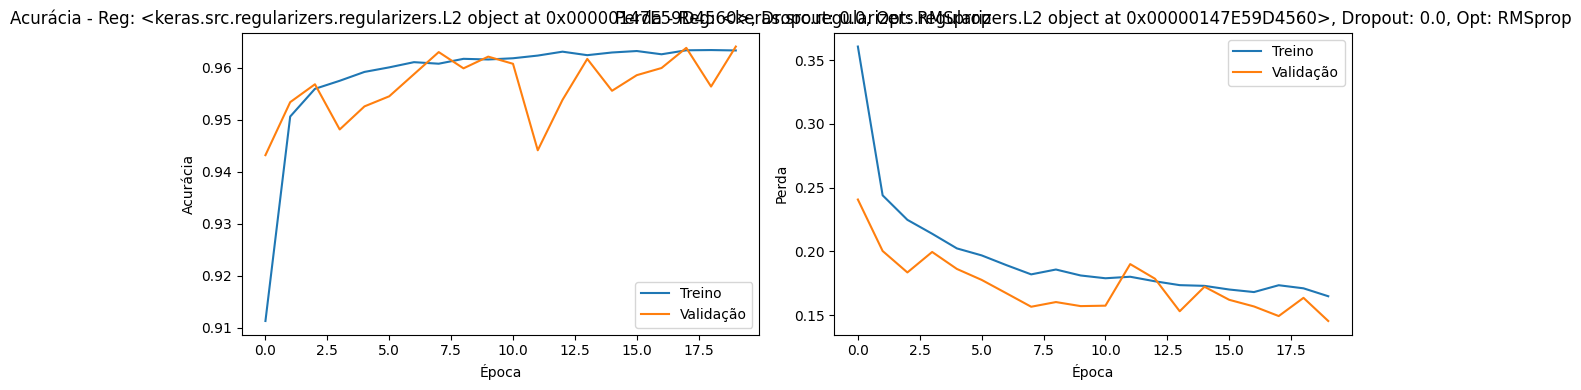

In [15]:
to_plot = results_reg_opt_df.iloc[[0,1,2,3,4,5,6,7,8]] 
def plot_history_reg_opt(history, reg, dropout, optimizer):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history['accuracy'], label='Treino')
    plt.plot(history['val_accuracy'], label='Validação')
    plt.title(f'Acurácia - Reg: {reg}, Dropout: {dropout}, Opt: {optimizer}')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history['loss'], label='Treino')
    plt.plot(history['val_loss'], label='Validação')
    plt.title(f'Perda - Reg: {reg}, Dropout: {dropout}, Opt: {optimizer}')
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.legend()
    plt.tight_layout()
    plt.show()

for idx, row in to_plot.iterrows():
    plot_history_reg_opt(row['history'], row['reg'], row['dropout'], row['optimizer'])